# Assignment 3-> Decision trees with a toy task and the UCI Adult dataset

In [10]:
import collections
from io import StringIO

import numpy as np
import pandas as pd
import pydotplus  # pip install pydotplus
import seaborn as sns
import numpy as np
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)


# Part 1. Toy dataset “Will They? Won’t They?"

Your goal is to figure out how decision trees work by walking through a toy problem. While a single decision tree does not yield outstanding results, other performant algorithms like gradient boosting and random forests are based on the same idea. That is why knowing how decision trees work might be useful.

We’ll go through a toy example of binary classification - Person A is deciding whether they will go on a second date with Person B. It will depend on their looks, eloquence, alcohol consumption (only for example), and how much money was spent on the first date.

Creating the Dataset

In [50]:
# Creating the Dataset with Dummy Variables

def create_df(dic , feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out , pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list , axis=1 , inplace = True)
    return out

# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train , test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat] , test[common_feat]


In [51]:
features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]

Generating the Training Data

In [52]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]

df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])


df_train = create_df(df_train , features)

df_train


,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,True,False,False,True,False,True,False,False,True
1,1,True,False,False,True,False,False,True,True,False
2,0,True,False,True,False,True,False,False,False,True
3,1,False,True,True,False,True,False,False,True,False
4,1,False,True,False,True,False,False,True,False,True
5,0,False,True,False,True,False,True,False,False,True
6,0,True,False,False,True,True,False,False,False,True


Making the Test Data


In [53]:
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,True,False,True,False,True,False,False,True
1,True,False,False,True,False,True,True,False
2,False,True,False,True,True,False,False,True


Some of the features present in the Test Set are not present in the Train set , therefore we adjust that using the function we made.

In [54]:
y = df_train["Will_go"]
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Alcoholic_beverage_no,Money_spent_little,Looks_handsome,Looks_repulsive,Eloquence_high,Eloquence_average,Money_spent_lots,Alcoholic_beverage_yes
0,False,False,True,False,True,False,True,True
1,False,True,True,False,False,False,False,True
2,True,False,True,False,False,True,True,False
3,True,True,False,True,False,True,False,False
4,False,False,False,True,False,False,True,True
5,False,False,False,True,True,False,True,True
6,False,False,True,False,False,True,True,True


In [55]:
df_test

,Alcoholic_beverage_no,Money_spent_little,Looks_handsome,Looks_repulsive,Eloquence_high,Eloquence_average,Money_spent_lots,Alcoholic_beverage_yes
0,True,False,True,False,False,True,True,False
1,False,True,True,False,True,False,False,True
2,False,False,False,True,False,True,True,True


Question 1 Train a decision tree using sklearn on the training data. You may choose any depth for the tree.

In [57]:
tree = DecisionTreeClassifier(criterion= "gini" , max_depth = 3 , random_state=17)

tree.fit(df_train , y)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,17
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [69]:
def visualise_tree(tree , features):
    dot_data = export_graphviz(tree , feature_names = features)
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

Display the resulting tree using graphviz.

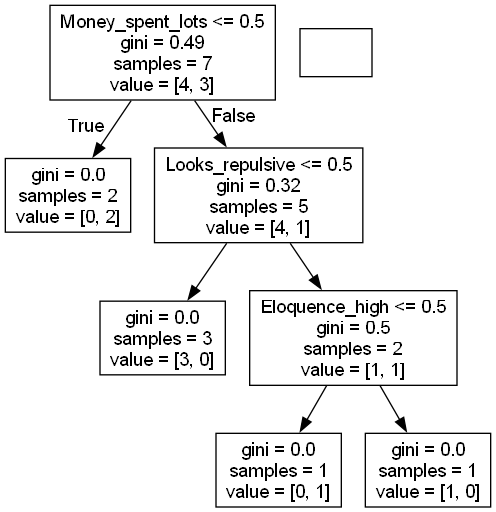

In [70]:
visualise_tree(tree , df_train.columns)

# Part 2 Functions for calculating entropy and information gain.
Consider the following warm-up example: we have 9 blue balls and 11 yellow balls. Let ball have label 1 if it is blue, 0 otherwise.

In [ ]:
balls = [1 for i in range(9)] + [0 for i in range(11)]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Next split the balls into two groups:

In [3]:
# Two Groups
balls_left = [1 for i in range(8)] + [0 for i in range(5)]  # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)]  # 1 blue and 6 yellow

# Implement a function to calculate the Shannon Entropy

Shanon Entropy is given by $$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$ where $p_i$ is the probability of finding the system in the ith state. 

In [14]:
def entropy(a_list):
    states = set(a_list)
    Total_Entropy = 0
    for i in states:
        p_i = len([x for x in a_list if x == i])/len(a_list)
        Total_Entropy -= p_i * np.log2(p_i)
    return Total_Entropy


In [15]:
print(entropy(balls))  # 9 blue и 11 yellow
print(entropy(balls_left))  # 8 blue и 5 yellow
print(entropy(balls_right))  # 1 blue и 6 yellow
print(entropy([1, 2, 3, 4, 5, 6]))  # entropy of a fair 6-sided die

0.9927744539878083
0.9612366047228759
0.5916727785823275
2.584962500721156


3. What is the entropy of the state given by the list balls_left?

0.9612366047228759

4. What is the entropy of a fair dice? (where we look at a dice as a system with 6 equally probable states)?

2.584962500721156


Implement an Information Gain calculator where IG is given by: $$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$ , where $q$ is the number of groups after the split, $N_i$ is number of objects from the sample in which variable $Q$ is equal to the $i$-th value.

In [16]:
# information gain calculation
def information_gain(root, left, right):
    """ root - initial data, left and right - two partitions of initial data"""
    s_0 = entropy(root)
    subtraction = 0
    for i in [left , right]:
        subtraction += (len(i)/len(root)) * entropy(i)
    Info_Gain = s_0 - subtraction
    return Info_Gain

    

In [17]:
information_gain(balls,balls_left,balls_right)

np.float64(0.16088518841412436)

# Part 3 UCI Adult Dataset

UCI Adult (no need to download it, we have a copy in the course repository): classify people using demographic data - whether they earn more than $50,000 per year or not.

Feature descriptions:

Age – continuous feature

Workclass – continuous feature

fnlwgt – final weight of object, continuous feature

Education – categorical feature

Education_Num – number of years of education, continuous feature

Martial_Status – categorical feature

Occupation – categorical feature

Relationship – categorical feature

Race – categorical feature

Sex – categorical feature

Capital_Gain – continuous feature

Capital_Loss – continuous feature

Hours_per_week – continuous feature

Country – categorical feature

Target – earnings level, categorical (binary) feature.